<h1>Рынок заведений общественного питания Москвы</h1>

# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.


Описание данных

Таблица rest_data:
    
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Загрузим данные и подготовим их к анализу

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
from io import BytesIO
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [127]:
data = pd.read_csv('/datasets/rest_data.csv')

In [128]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [130]:
data.duplicated().sum()

0

**Вывод** 

В датафрейме 15366 строк и 6 столбцов. Данные чистые, пропущенных значений нет, дубликатов нет, даже название столбцов в змеином стиле. Можно продолжать работу.

In [131]:
data['object_name']=data['object_name'].str.strip().str.lower()
data['address']=data['address'].str.strip().str.lower()
data['chain']=data['chain'].str.strip().str.lower()
display(data)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36


In [132]:
data['number'].describe()


count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [133]:
data['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
172       1
520       1
680       1
760       1
495       1
Name: number, Length: 315, dtype: int64

## Анализ данных


### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Построим гисторграмму, где каждому типу общественного питания(в датафрейме это столбец object_type) будет указано кол-во заведений такого типа в г. Москва.

In [134]:
data['object_type'] = data['object_type'].str.strip().str.lower()
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')

# заменяем длинное название портящее вид диаграммы


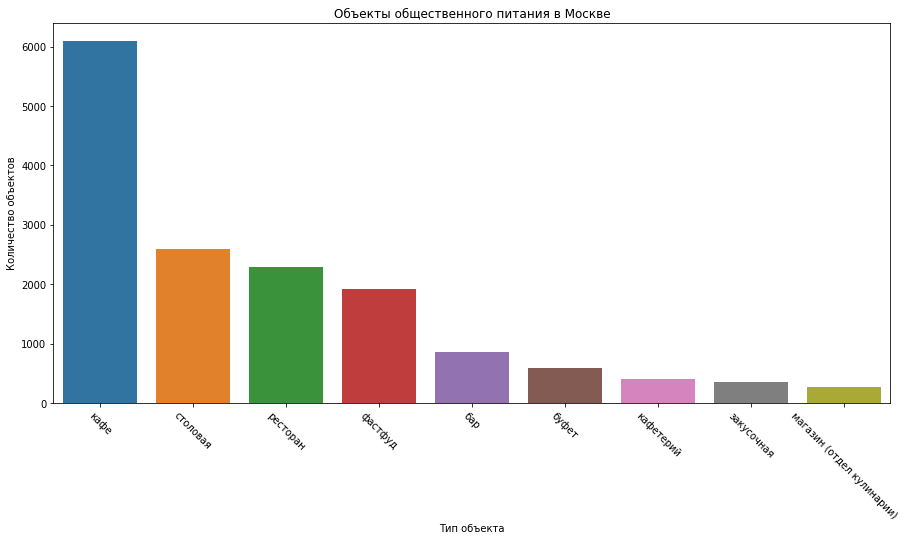

In [135]:
data1 = data.groupby('object_type').count().reset_index()
plt.figure(figsize=(15, 7))
ax=sns.barplot(x='object_type', y='number', data = data1.sort_values('number', ascending=False))
ax.set_title('Объекты общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation = -45)

plt.show()



**Вывод**

Больше всего мы видим среди объектов общественного  питания - **Кафе**. Далее по убывния количества: **столовые**,**рестораны**, **фастфуд(пердпиятия быстрого обслуживания)** и.т.д.(см. график)

### Исследуем соотношение сетевых и несетевых заведений по количеству. Постройте график.

Для наглядности переименуем значения в столбце chain и построим круговой график, чтобы были видны доли сетевое/несетевое заведение.

In [136]:
data['chain'] = data['chain'].map({'нет':'несетевой','да':'сетевой'})
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [137]:
data['chain'].value_counts()

несетевой    12398
сетевой       2968
Name: chain, dtype: int64

In [1]:
fig = go.Figure(data=go.Pie(labels=data['chain'].value_counts(), values=data['chain'].value_counts(),pull=[0, 0.1]))
fig.update_layout(title="Cоотношение сетевых и несетевых заведений по количеству")
for name in fig.data:
    name['labels']=['Несетевые', 'Сетевые']
fig.show()    


NameError: name 'go' is not defined

**Вывод**: Несетевых объектов общественного питания ~ 81%, в то время как сетевых объектов 19%. Т.е сетевых заведений в 4 раза меньше.

### Определим для какого вида объекта общественного питания характерно сетевое распространение.

Создадим сводную таблицу таблицу.

In [139]:
data_set = data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
data_set['ratio_set%'] = ((data_set['сетевой'] / (data_set['сетевой'] + data_set['несетевой'])) * 100).round(2)
display(data_set)

chain,object_type,несетевой,сетевой,ratio_set%
0,бар,819,37,4.32
1,буфет,574,11,1.88
2,закусочная,304,56,15.56
3,кафе,4703,1396,22.89
4,кафетерий,346,52,13.07
5,магазин (отдел кулинарии),195,78,28.57
6,ресторан,1741,544,23.81
7,столовая,2584,3,0.12
8,фастфуд,1132,791,41.13


In [140]:
#display(data_set.columns)

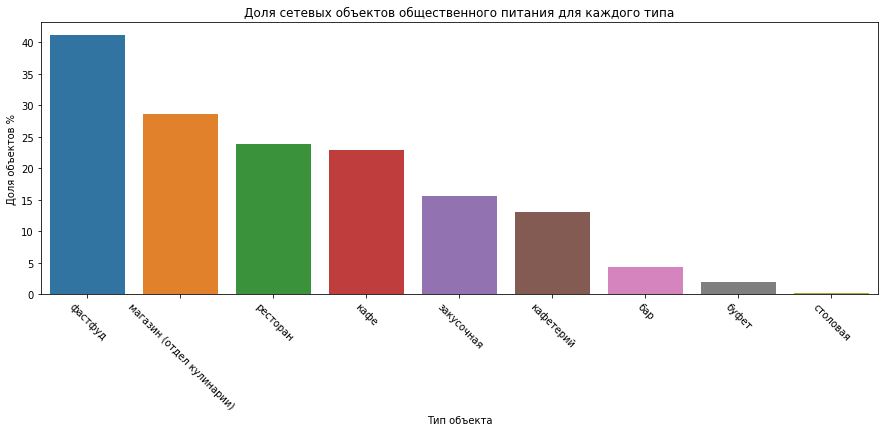

In [141]:
plt.figure(figsize=(15, 5))

ax=sns.barplot(x='object_type', y='ratio_set%', data = data_set.sort_values('ratio_set%', ascending=False))
ax.set_title('Доля сетевых объектов общественного питания для каждого типа')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Доля объектов %')
plt.xticks(rotation = -45)
plt.show()

**Вывод**

Сетевые объекты как правило это фастфуд, магазин кулинарии, а так же рестораны, на четвёртом месте кафе. А вот столовые, буфеты и бары как мы видим, это как правило несетевые заведения.

### Рассмотрим для каждого вида объекта общественного питания  среднее количество посадочных мест. Уточним какой вид предоставляет в среднем самое большое количество посадочных мест.


In [142]:
data.groupby('object_type')['number'].describe().sort_values('mean')


,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
фастфуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0


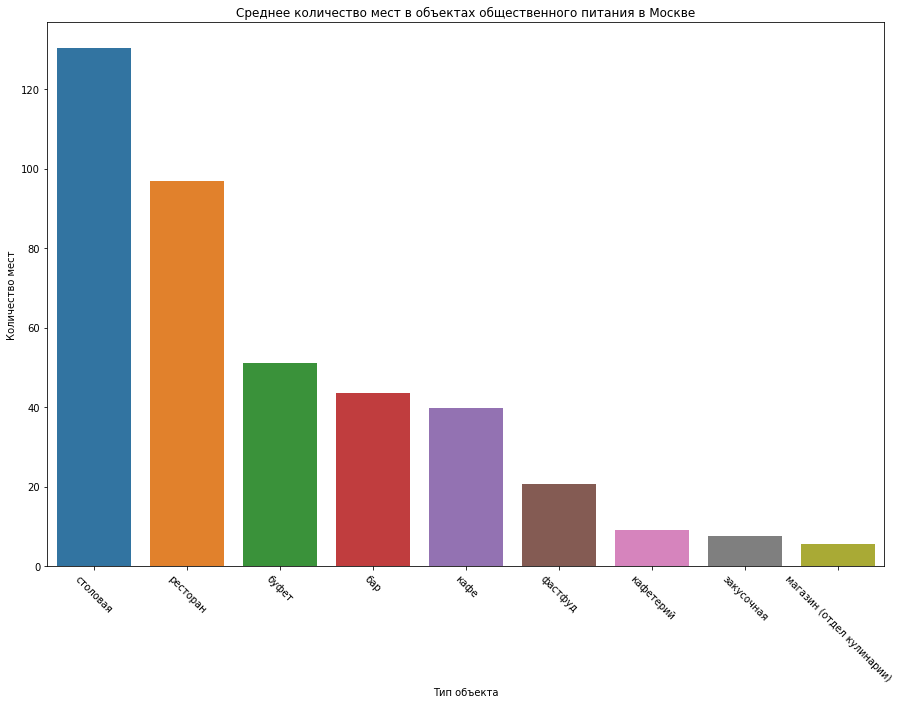

In [143]:
plt.figure(figsize=(15, 10))

data_mest_mean = data.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()
ax = sns.barplot(x='object_type', y='number', data=data_mest_mean )
ax.set_title('Среднее количество мест в объектах общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
plt.xticks(rotation = -45)
plt.show()

Для более точного анализа, предлагаю рассмотреть медианное значение, тогда выбросы(аномальное кол-во посадочных мест) небудут влиять и размывать картину

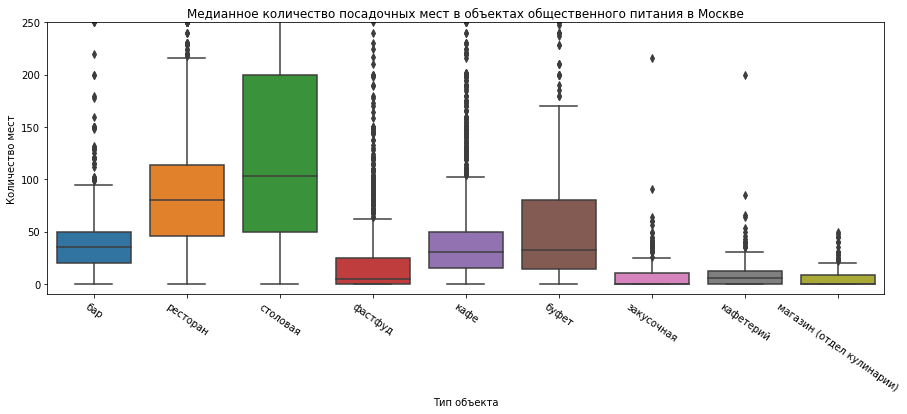

In [144]:
plt.figure(figsize=(15, 5))

ax=sns.boxplot(x='object_type', y='number', data= data.sort_values('number', ascending=False))
ax.set_ylim(-10,250)
ax.set_title('Медианное количество посадочных мест в объектах общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
plt.xticks(rotation = -35)

plt.show()

**Вывод**

Из графика видим, что только в ресторанах и столовых медианное значение посадочных мест превышает 50. Мы видим, что для кафе это примерно 30 посадочных мест.


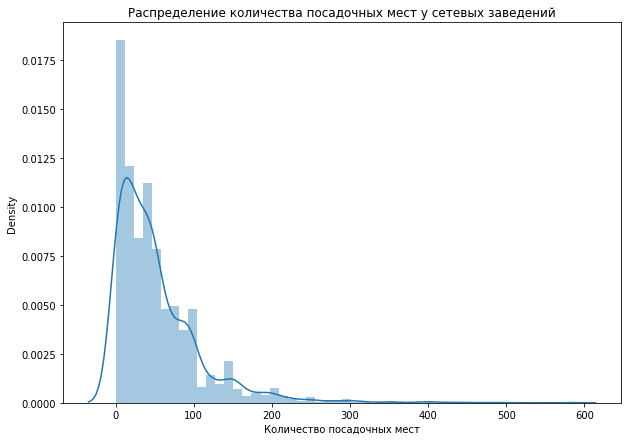

In [145]:
set_chain = data.query('chain == "сетевой"') # Построим гистограмму распределение посадочных мест для сетвых заведений

plt.figure(figsize=(10,7))
sns.distplot(set_chain['number'])
plt.title('Распределение количества посадочных мест у сетевых заведений')
plt.xlabel("Количество посадочных мест")
plt.show()

### Выделим в отдельный столбец информацию об улице из столбца address .


In [146]:
data_street = data['address'].str.split(',', expand=True) # разобъем адресную строку на составляюшие 

In [147]:
data_street = data['address'].str.split(',', expand=True).rename(columns={0:'city', 1:'street',3:'nome',})
# переименуем столбцы на более понятные
display(data_street)

,city,street,2,nome,4,5,6
0,город москва,улица егора абакумова,дом 9,None,None,None,None
1,город москва,улица талалихина,дом 2/1,корпус 1,None,None,None
2,город москва,абельмановская улица,дом 6,None,None,None,None
3,город москва,абрамцевская улица,дом 1,None,None,None,None
4,город москва,абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15361,город москва,3-й крутицкий переулок,дом 18,None,None,None,None
15362,город москва,улица земляной вал,дом 33,None,None,None,None
15363,город москва,улица земляной вал,дом 33,None,None,None,None
15364,город москва,поселение московский,киевское шоссе,22-й километр,домовладение 4,строение 1,None


In [148]:
data['street']=data_street['street']
display(data)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,сетевой,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,сетевой,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,сетевой,кафе,"город москва, поселение московский, киевское ш...",36,поселение московский


In [3]:

    
#words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         #'село','аллея','бульвар','набережная','тупик','линия']

#str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

#data["street"] = data["address"].str.extract(str_pat, flags=re.I)


In [149]:
#data_street['city'].value_counts()

### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.

In [150]:
top_streets = data.groupby('street', as_index=False).agg({'object_name':'count'}).sort_values(by = 'object_name', ascending = False).head(12).reset_index()
top_streets['street']= top_streets['street'].str.strip().str.lower()
top_streets=top_streets[top_streets['street']!='город зеленоград']
top_streets=top_streets[top_streets['street']!='поселение сосенское']

top_streets['street']= top_streets['street'].str.strip().str.lower()
top_10 = top_streets.head(12).reset_index()

# удалим городо Зеленоград. Будем считать, что он относится к МО             
display(top_10)

,level_0,index,street,object_name
0,1,1121,проспект мира,204
1,2,1125,профсоюзная улица,182
2,3,747,ленинградский проспект,171
3,4,1082,пресненская набережная,167
4,5,417,варшавское шоссе,161
5,6,750,ленинский проспект,147
6,8,1118,проспект вернадского,132
7,9,738,кутузовский проспект,114
8,10,663,каширское шоссе,112
9,11,669,кировоградская улица,110


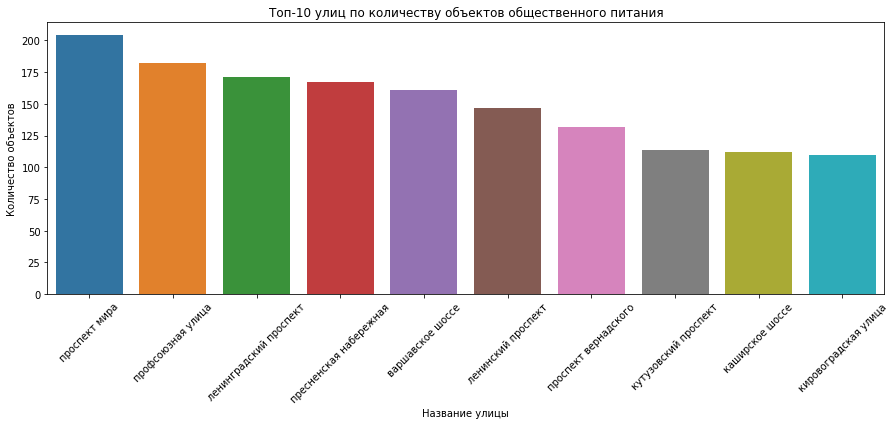

In [151]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(x='street', y='object_name', data=top_10)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Название улицы')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

In [152]:
# обращаемся к внешнему df
#spreadsheet_id = '1fGtfX_6otenOiCBRzt61bQe9l3gB7B8BEp-qPcWkRKA'
#r = requests.get(file_name)
moscow_streets = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')
display(moscow_streets)


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [153]:
moscow_streets = moscow_streets.rename(columns={'streetname':'street'})
moscow_streets['street'] = moscow_streets['street'].str.lower()

# переименуем столбцы на более понятные
display(moscow_streets)

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


In [154]:
streets_area_top_10 = top_10.merge(moscow_streets, on='street', how='left')
streets_area_top_10 = streets_area_top_10.drop(['index','areaid', 'object_name'],1)
                                            
                                            
#объеденим два датафрейма по столбцу street.
display(streets_area_top_10)

,level_0,street,okrug,area
0,1,проспект мира,СВАО,Алексеевский район
1,1,проспект мира,СВАО,Ярославский Район
2,1,проспект мира,СВАО,Район Марьина роща
3,1,проспект мира,СВАО,Останкинский район
4,1,проспект мира,СВАО,Район Ростокино
5,1,проспект мира,СВАО,Район Свиблово
6,1,проспект мира,ЦАО,Мещанский район
7,2,профсоюзная улица,ЮЗАО,Академический район
8,2,профсоюзная улица,ЮЗАО,Район Черемушки
9,2,профсоюзная улица,ЮЗАО,Район Ясенево


**Вывод** 

Мы получили наиболее популярные улицы для расположения кафе. Как мы видим это разные районы Москвы. Думаю есть смысл нашим менеджерам изучить стоимость аренды и проходимость, чтобы встроить эту информацию в наш бизнес план.

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответем на вопрос — в каких районах Москвы находятся эти улицы?

Найдем число улиц с одним объектом. Для этого создадим сводную таблицу one_object

In [155]:
one_object = data.groupby('street').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one_object = one_object.query('object_name == 1')
one_object =one_object.reset_index()
one_object['street'] = one_object['street'].str.lower()
one_object= one_object.drop('object_name',1)
display(one_object.head())


,street
0,барабанный переулок
1,улица недорубова
2,базовая улица
3,улица линии октябрьской железной дороги
4,улица лапина


In [156]:
display(moscow_streets)

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


Итого 579 улиц всего с одним объектом.

In [157]:
one_object['street'] = one_object['street'].str.strip().str.lower()
one_object_area = one_object.merge(moscow_streets, on='street', how='left')
one_object_area = one_object_area.drop(['areaid'],1)
one_object_area.drop_duplicates()

display(one_object_area.head())


,street,okrug,area
0,барабанный переулок,ВАО,Район Соколиная Гора
1,улица недорубова,NaN,NaN
2,базовая улица,ЗАО,Район Внуково
3,улица линии октябрьской железной дороги,САО,Тимирязевский Район
4,улица лапина,ЮВАО,Район Лефортово


In [158]:
check_street = streets_area_top_10['area'].isnull().sum()
display(check_street)

0

In [159]:
check_street2 = one_object_area['area'].isnull().sum()
display(check_street2)

62

In [160]:
one_object_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 621
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  622 non-null    object
 1   okrug   560 non-null    object
 2   area    560 non-null    object
dtypes: object(3)
memory usage: 19.4+ KB


**Вывод**
622 улицы которые находятся в 560 районах г. Москва имеют всего одно заведение. Тоже интересный вариант, меньше конкурентов больше посетителей.


### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

In [161]:
data['street']= data['street'].str.strip().str.lower()
distribution_number_seats = data[data['street'].isin(streets_area_top_10.reset_index()['street'])]
distribution_number_seats.head()
distribution_number_seats['number'].describe()

count    1500.000000
mean       58.020667
std        90.058384
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

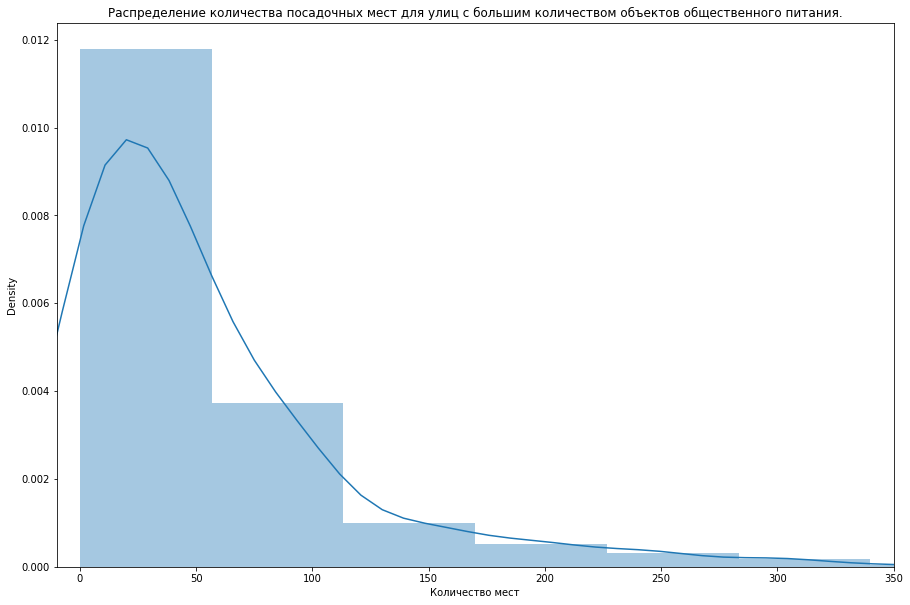

In [162]:
plt.figure(figsize=(15, 10))

ax = sns.distplot(distribution_number_seats['number'],bins=30)
ax.set_xlim(-10,350)

ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.')
ax.set_xlabel('Количество мест')

plt.show()




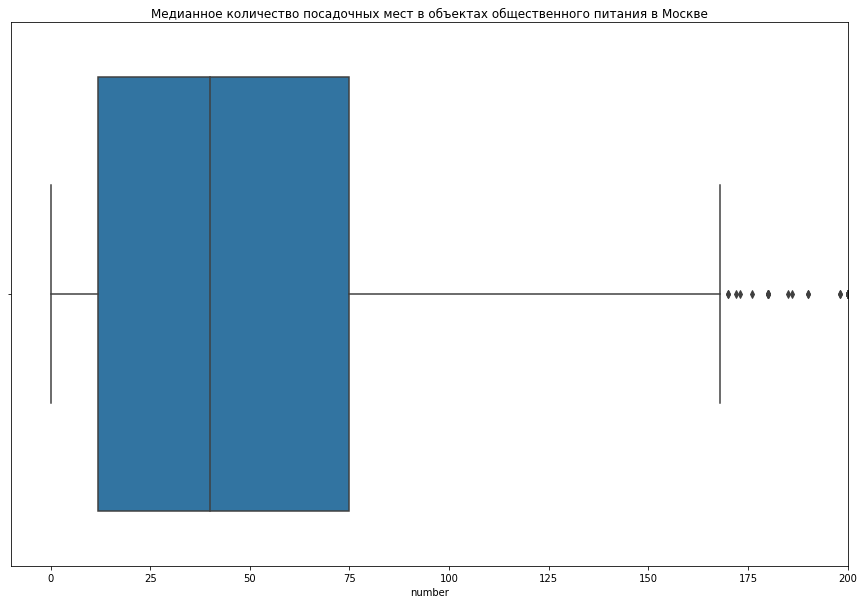

In [163]:
plt.figure(figsize=(15, 10))

ax = sns.boxplot(x=distribution_number_seats['number'])
ax.set_title('Медианное количество посадочных мест в объектах общественного питания в Москве')
ax.set_xlim(-10,200)
plt.show()

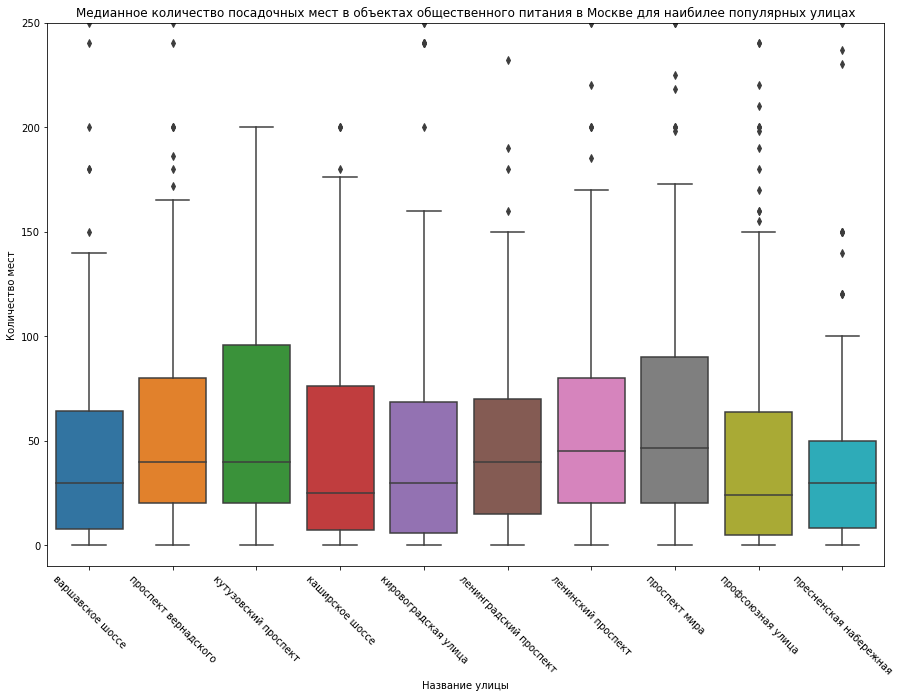

In [164]:
plt.figure(figsize=(15, 10))

ax=sns.boxplot(x='street', y='number', data= distribution_number_seats)
ax.set_ylim(-10,250)
ax.set_title('Медианное количество посадочных мест в объектах общественного питания в Москве для наибилее популярных улицах')
ax.set_xlabel('Название улицы') 
ax.set_ylabel('Количество мест')
plt.xticks(rotation = -45)

plt.show()

**Вывод**

Среднее значение посадочных мест для заведений которые находятся на популярных улицах г. Москва: 54 места. Нормальным считается распределение от 15 до 70.  При этом медианное значение 35. Предлагаю ориентироваться на медианное значение в нашем бизнес плане. Также мы видим, что кол-во посадочных мест на популярных улицах в целом небольшое. Значит можем предположить, что аренды тут высокие.

<div class="alert alert-success">
<b>✅ Комментарий ревьюера:</b> 

Да, все корректно. Молодец, что применяешь построение гистограмм для определения распределения выборки.
</div>

## Общий вывод

По результату исследований можно сделать следующие выводы:

- Наиболее популярные форматы заведений: Кафе, Cтоловая, Ресторан, Фастфуд.

- Преобладают в основном несетевые заведения. 

- Сетевыми заведениями в основном являются фастфуд, кулинария и рестораны. На 4 месте Кафе.

- Для Кафе в целом характерно 30 посадочных мест в г. Москва.
 
- Мы получили топ 10 популярных улиц, где больше всего заведений общепита.  Они находятся в разных районах. Есть смысл изучить проходимость и стоимость аренды.

- Мы нашли улицы где есть только одно заведение, есть смысл рассмотреть проходимость, арендую стоимость, возможно будут какие либо крупные застройки в этих районах.

- Наибольее оптимальное кол-во посадочных мест 35 мест.


Предлагаю:

- Ориентироваться на популярные улицы.

- Изучить арендную стоимость на этих улицах. 

- Изучить средний чек и проходимость на популярных улицах.

- Рассмотреть туристические места. 

- Обратить внимания на близость новых объектов или бизнес центров.

- Помещения искать исходя из возможности разместить 35 гостей.

- Рассмотреть вариант размещения кафе на улицах где только одно заведения общественного питания.

Презентация: https://drive.google.com/file/d/1uoOhKx_htiJrVMkbpg3WaqDFYyOtu_AS/view?usp=sharing
